In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/loan.csv


--2022-04-02 13:52:29--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/loan.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.149.174
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.149.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38013 (37K) [text/csv]
Saving to: ‘loan.csv’

loan.csv            100%[===================>]  37.12K   152KB/s    in 0.2s    

2022-04-02 13:52:31 (152 KB/s) - ‘loan.csv’ saved [38013/38013]



In [ ]:
df = pd.read_csv('loan.csv')

In [ ]:
df = df.set_index('Loan_ID')

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


#Filling null values
EN: For self_employed, we have 500 "no", 82 "yes". I can either use the mode to fill the null values, or check by myself which values are closer. In this case, it's more likely that the values are a "no".
\
IT: Per self_employed, dato che 500 non sono self employed e 82 si, controllo le statistiche per i valori nan e decido se rimpiazzarli con "No", dato che è più probabile che non siano self employed visti i numeri

In [ ]:
df.groupby('Self_Employed', dropna=False).describe().T #meglio utilizzare la moda 

Self_Employed                      No           Yes           NaN
ApplicantIncome   count    500.000000     82.000000     32.000000
                  mean    5049.748000   7380.817073   5863.218750
                  std     5682.895810   5883.564795  10728.592526
                  min      150.000000    674.000000    210.000000
                  25%     2824.500000   3452.250000   2861.500000
                  50%     3705.500000   5809.000000   3659.500000
                  75%     5292.750000   9348.500000   5085.250000
                  max    81000.000000  39147.000000  63337.000000
CoapplicantIncome count    500.000000     82.000000     32.000000
                  mean    1580.989840   1501.341463   2557.500000
                  std     2438.161181   2780.713676   7243.114884
                  min        0.000000      0.000000      0.000000
                  25%        0.000000      0.000000      0.000000
                  50%     1293.500000      0.000000   1417.500000
                  75%     2303.000000   2164.500000   2374.750000
                  max    33837.000000  20000.000000  41667.000000
LoanAmount        count    482.000000     79.000000     31.000000
                  mean     141.748963    172.000000    153.709677
                  std       79.780919    108.634650     97.168648
                  min        9.000000     25.000000     42.000000
                  25%      100.000000    106.000000    110.000000
                  50%      125.000000    150.000000    125.000000
                  75%      161.750000    189.000000    157.500000
                  max      700.000000    650.000000    490.000000
Loan_Amount_Term  count    489.000000     80.000000     31.000000
                  mean     343.263804    336.300000    336.774194
                  std       64.696881     69.395290     61.339878
                  min       12.000000     60.000000    180.000000
                  25%      360.000000    360.000000    360.000000
                  50%      360.000000    360.000000    360.000000
                  75%      360.000000    360.000000    360.000000
                  max      480.000000    480.000000    360.000000
Credit_History    count    463.000000     75.000000     26.000000
                  mean       0.835853      0.840000      0.961538
                  std        0.370809      0.369075      0.196116
                  min        0.000000      0.000000      0.000000
                  25%        1.000000      1.000000      1.000000
                  50%        1.000000      1.000000      1.000000
                  75%        1.000000      1.000000      1.000000
                  max        1.000000      1.000000      1.000000

In [ ]:
df['Self_Employed'] = df['Self_Employed'].fillna('No')

Adesso ho 532 "No" in Self-Employed

In [ ]:
df['Self_Employed'].describe()

count     614
unique      2
top        No
freq      532
Name: Self_Employed, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [ ]:
df.nunique()


Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
df.groupby('Gender', dropna=False).describe().T

Gender                         Female          Male           NaN
ApplicantIncome   count    112.000000    489.000000     13.000000
                  mean    4643.473214   5446.460123  10333.538462
                  std     3585.381488   6185.789262  14130.655691
                  min      210.000000    150.000000    674.000000
                  25%     2661.500000   2917.000000   2873.000000
                  50%     3583.000000   3865.000000   3583.000000
                  75%     4606.500000   5923.000000   9833.000000
                  max    19484.000000  81000.000000  51763.000000
CoapplicantIncome count    112.000000    489.000000     13.000000
                  mean    1108.008929   1742.932352   1465.692308
                  std     4094.595514   2606.507054   1722.670281
                  min        0.000000      0.000000      0.000000
                  25%        0.000000      0.000000      0.000000
                  50%        0.000000   1430.000000   1833.000000
                  75%     1635.000000   2436.000000   1917.000000
                  max    41667.000000  33837.000000   5296.000000
LoanAmount        count    109.000000    470.000000     13.000000
                  mean     126.697248    149.265957    208.538462
                  std       79.286460     82.810851    167.745152
                  min        9.000000     17.000000     94.000000
                  25%       88.000000    104.000000    112.000000
                  50%      113.000000    130.000000    159.000000
                  75%      138.000000    175.000000    182.000000
                  max      600.000000    650.000000    700.000000
Loan_Amount_Term  count    109.000000    478.000000     13.000000
                  mean     352.293578    339.665272    341.538462
                  std       56.722081     67.089140     51.291025
                  min       36.000000     12.000000    180.000000
                  25%      360.000000    360.000000    360.000000
                  50%      360.000000    360.000000    360.000000
                  75%      360.000000    360.000000    360.000000
                  max      480.000000    480.000000    360.000000
Credit_History    count    101.000000    451.000000     12.000000
                  mean       0.831683      0.847007      0.750000
                  std        0.376013      0.360381      0.452267
                  min        0.000000      0.000000      0.000000
                  25%        1.000000      1.000000      0.750000
                  50%        1.000000      1.000000      1.000000
                  75%        1.000000      1.000000      1.000000
                  max        1.000000      1.000000      1.000000

EN: My null values in the Gender feature are only 13 and very different from the two genders: I decide to drop them. Otherwise, I could have used the mode in this case too.

IT: Decido di eliminare i record con valori nulli in Gender: hanno dei valori troppo alti e diversi dagli altri due, e sono solo 13.

In [ ]:
df= df.dropna(subset = ['Gender']) 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 601 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         586 non-null    object 
 3   Education          601 non-null    object 
 4   Self_Employed      601 non-null    object 
 5   ApplicantIncome    601 non-null    int64  
 6   CoapplicantIncome  601 non-null    float64
 7   LoanAmount         579 non-null    float64
 8   Loan_Amount_Term   587 non-null    float64
 9   Credit_History     552 non-null    float64
 10  Property_Area      601 non-null    object 
 11  Loan_Status        601 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 61.0+ KB


In [ ]:
df.groupby('Dependents', dropna=False).describe().T

Dependents                          0             1             2  \
ApplicantIncome   count    338.000000    101.000000     99.000000   
                  mean    4920.618343   5923.950495   4963.303030   
                  std     5029.788458   5601.777483   3174.956598   
                  min      150.000000   1000.000000    210.000000   
                  25%     2602.250000   3052.000000   3156.000000   
                  50%     3610.000000   4050.000000   4009.000000   
                  75%     5470.250000   6400.000000   5877.000000   
                  max    63337.000000  37719.000000  17500.000000   
CoapplicantIncome count    338.000000    101.000000     99.000000   
                  mean    1617.583195   1422.207921   1683.058586   
                  std     2642.128906   1838.716255   2582.045978   
                  min        0.000000      0.000000      0.000000   
                  25%        0.000000      0.000000      0.000000   
                  50%     1315.000000   1210.000000   1300.000000   
                  75%     2416.750000   2079.000000   2017.500000   
                  max    33837.000000  10968.000000  20000.000000   
LoanAmount        count    327.000000     97.000000     96.000000   
                  mean     135.972477    158.381443    150.812500   
                  std       76.534622     95.561329     71.895877   
                  min        9.000000     26.000000     17.000000   
                  25%       97.000000    106.000000    108.000000   
                  50%      120.000000    138.000000    133.500000   
                  75%      154.500000    175.000000    187.000000   
                  max      650.000000    600.000000    480.000000   
Loan_Amount_Term  count    327.000000    100.000000     99.000000   
                  mean     347.853211    330.840000    340.484848   
                  std       58.546635     74.311482     65.515906   
                  min       12.000000     36.000000     84.000000   
                  25%      360.000000    360.000000    360.000000   
                  50%      360.000000    360.000000    360.000000   
                  75%      360.000000    360.000000    360.000000   
                  max      480.000000    480.000000    480.000000   
Credit_History    count    310.000000     89.000000     93.000000   
                  mean       0.858065      0.842697      0.870968   
                  std        0.349548      0.366149      0.337053   
                  min        0.000000      0.000000      0.000000   
                  25%        1.000000      1.000000      1.000000   
                  50%        1.000000      1.000000      1.000000   
                  75%        1.000000      1.000000      1.000000   
                  max        1.000000      1.000000      1.000000   

Dependents                         3+           NaN  
ApplicantIncome   count     48.000000     15.000000  
                  mean    7348.312500   5187.600000  
                  std    12276.446761   2961.012708  
                  min      416.000000   2833.000000  
                  25%     3293.000000   3298.500000  
                  50%     4379.000000   4735.000000  
                  75%     5878.750000   5460.000000  
                  max    81000.000000  13650.000000  
CoapplicantIncome count     48.000000     15.000000  
                  mean    2150.833333   1076.133333  
                  std     6218.607148   1446.951518  
                  min        0.000000      0.000000  
                  25%        0.000000      0.000000  
                  50%        0.000000      0.000000  
                  75%     2015.500000   1775.000000  
                  max    41667.000000   4490.000000  
LoanAmount        count     46.000000     13.000000  
                  mean     173.739130    128.384615  
                  std      111.383908     36.294027  
                  min       40.000000     70.000000  
                  25%      100.00000

In [ ]:
df['Dependents'] = df['Dependents'].fillna('1')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df= df.dropna(subset = ['Married']) 

In [ ]:
df= df.fillna(df.mean()) #I'll fill the remaining values with the mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         598 non-null    object 
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         598 non-null    float64
 8   Loan_Amount_Term   598 non-null    float64
 9   Credit_History     598 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 60.7+ KB


In [ ]:
df.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#Label encoding

In [ ]:
df['Dependents'] = df['Dependents'].replace('3+', 3) #Since 3+ is a string, I have to change it to an int

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         598 non-null    object 
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         598 non-null    float64
 8   Loan_Amount_Term   598 non-null    float64
 9   Credit_History     598 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 60.7+ KB


In [ ]:
df['Dependents'] = df['Dependents'].astype('int')


In [ ]:
from sklearn.preprocessing import LabelEncoder #I'm using the Label Encoder for my target
enc = LabelEncoder()

df['Loan_Status'] = enc.fit_transform(df['Loan_Status'])

In [ ]:
enc_name_mapping = dict(zip(enc.classes_, enc.transform(enc.classes_)))
print(enc_name_mapping) #this is the dictionary with the values of my target

{'N': 0, 'Y': 1}


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         598 non-null    int64  
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         598 non-null    float64
 8   Loan_Amount_Term   598 non-null    float64
 9   Credit_History     598 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 60.7+ KB


In [ ]:
categorical_features = df[['Gender', 'Married', 'Education','Self_Employed',
       'Property_Area']] #cat featu senza il target

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
for col in categorical_features:
    print(df[col].unique())

['Male' 'Female']
['No' 'Yes']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Urban' 'Rural' 'Semiurban']


I'll use map to change the categorical into numerical values:

In [ ]:
df['Gender']= df['Gender'].map({'Male':0, 'Female':1}) 


In [ ]:
df['Married']= df['Married'].map({'No':0, 'Yes':1}) 


In [ ]:
df['Education']= df['Education'].map({'Graduate':1, 'Not Graduate':0}) 


In [ ]:
df['Self_Employed']= df['Self_Employed'].map({'No':0, 'Yes':1}) 


In [ ]:
df['Property_Area']= df['Property_Area'].map({'Urban':0, 'Rural':1, 'Semiurban':2}) 


I'll save them as dictionaries so I can have a legend:

In [ ]:
Gender = {'Male':0, 'Female':1}

In [ ]:
Married = {'No':0, 'Yes':1}
Education = {'Graduate':1, 'Not Graduate':0}
Self_Employed= {'No':0, 'Yes':1}
Property_Area= {'Urban':0, 'Rural':1, 'Semiurban':2}

#EDA

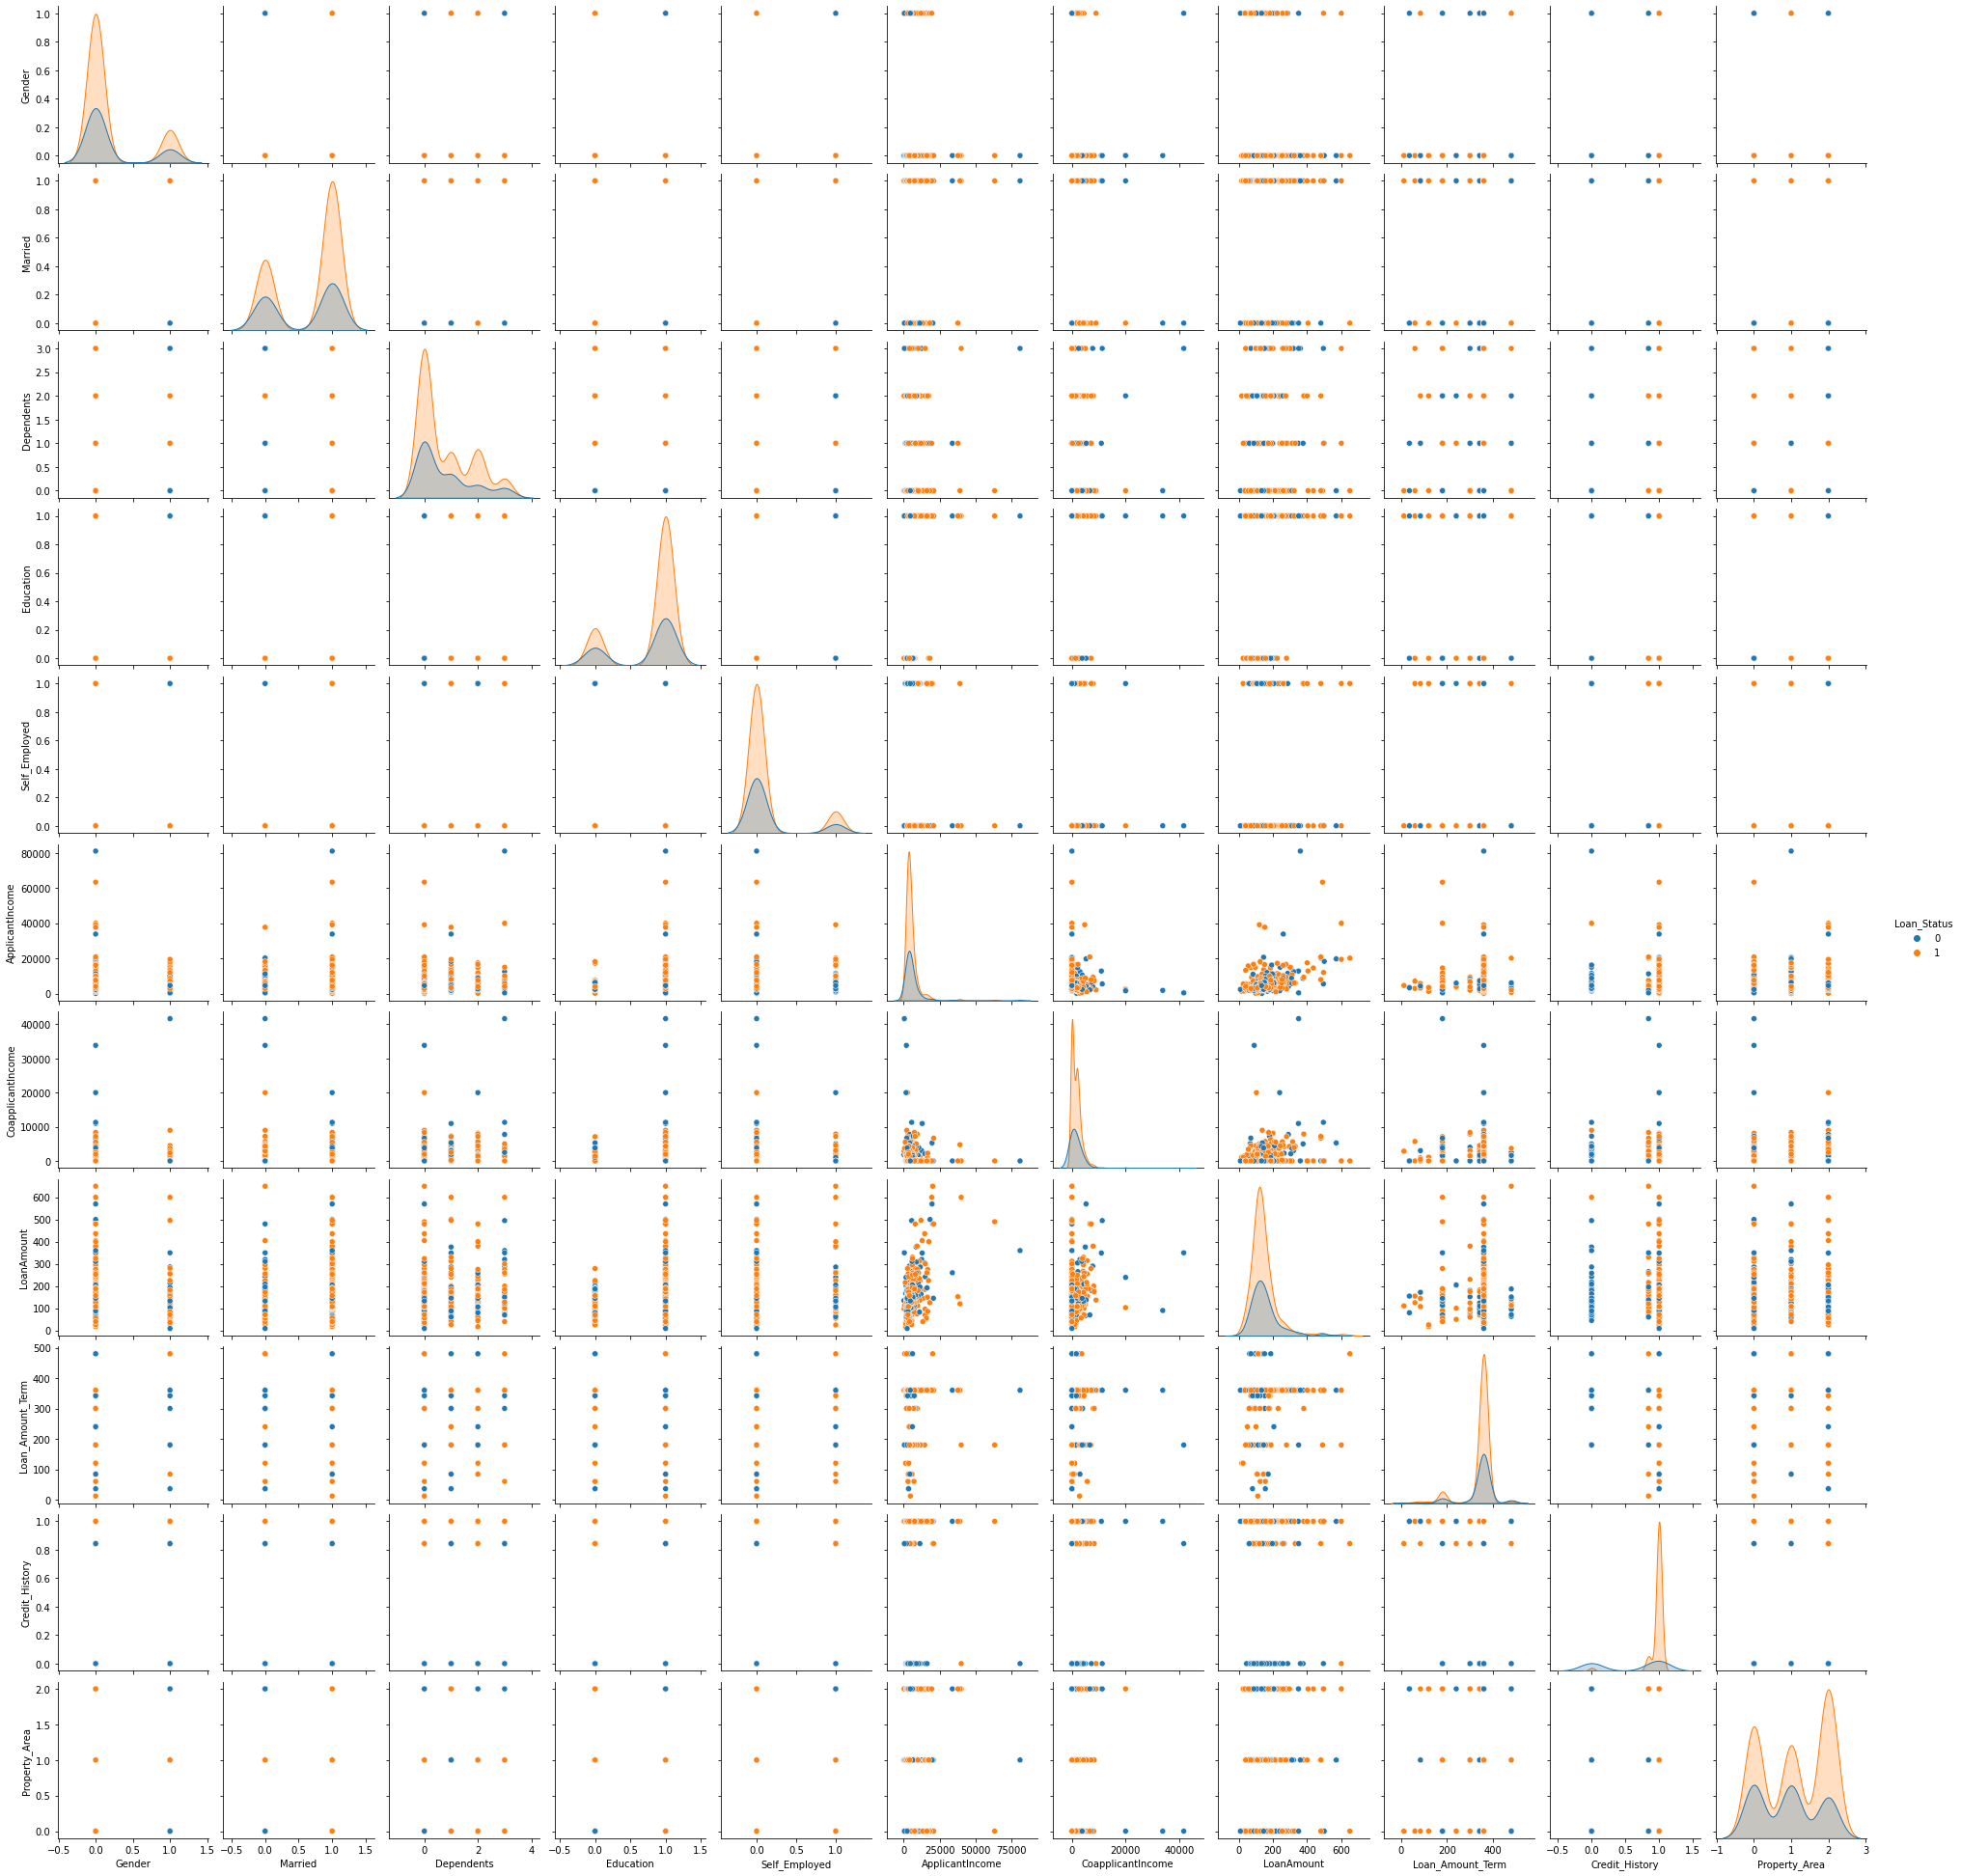

In [ ]:
sns.pairplot(df, hue="Loan_Status")

Classes are hard to recognize, median values are very similar.

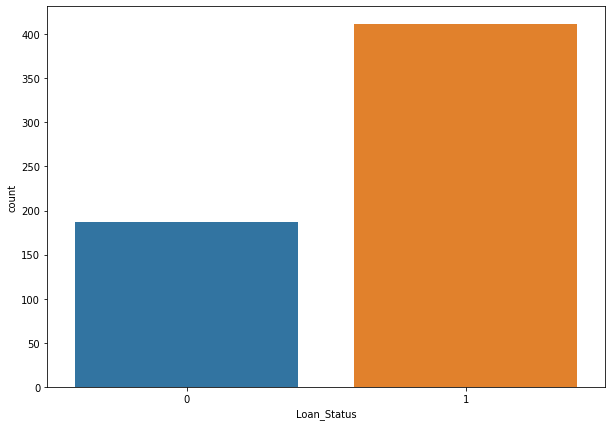

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='Loan_Status', data=df);

In [ ]:
df['Loan_Status'].value_counts()


1    411
0    187
Name: Loan_Status, dtype: int64

EN: The problem is definitely unbalanced! (1 is yes)

IT: Il problema è decisamente sbilanciato!

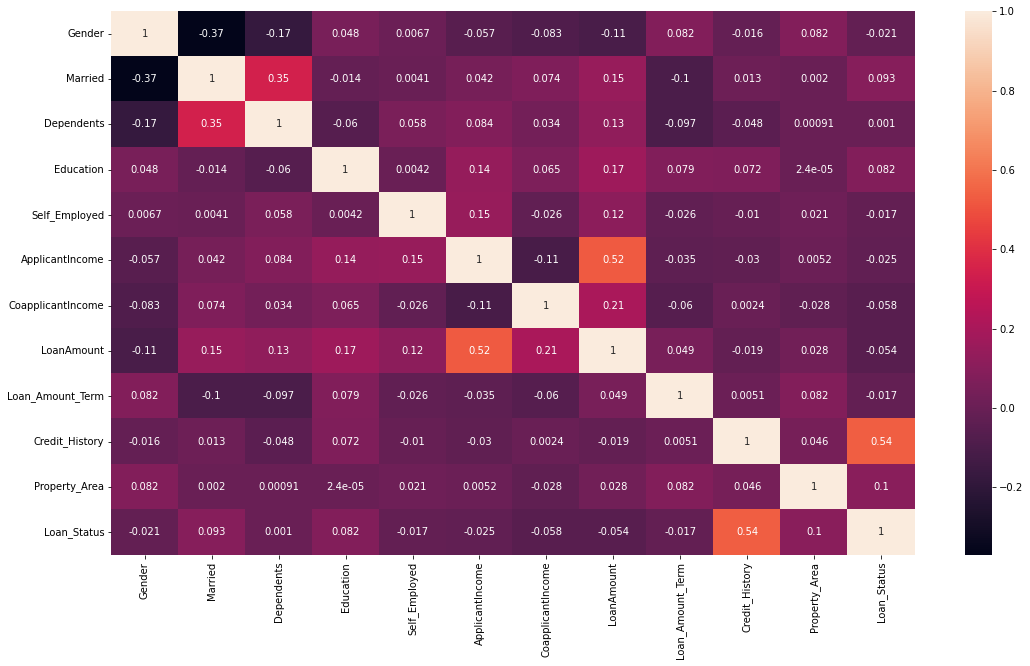

In [ ]:
import seaborn as sns

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

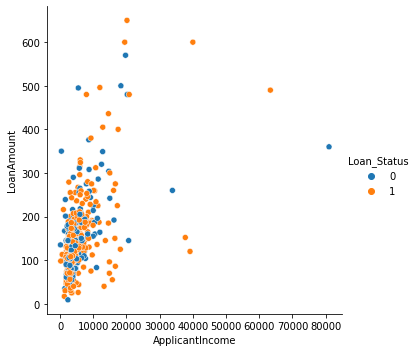

In [ ]:
sns.relplot(data=df, x="ApplicantIncome", y="LoanAmount", hue="Loan_Status")


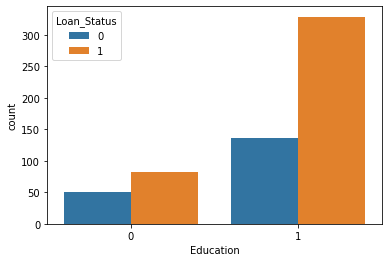

In [ ]:
sns.countplot(x='Education',hue='Loan_Status',data=df)


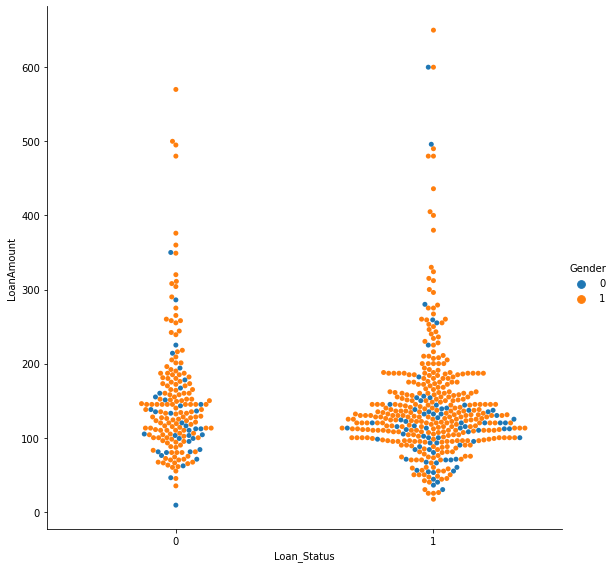

In [ ]:
sns.catplot(x="Loan_Status", y="LoanAmount", hue="Gender", kind="swarm", data=df, height=8, aspect=1);

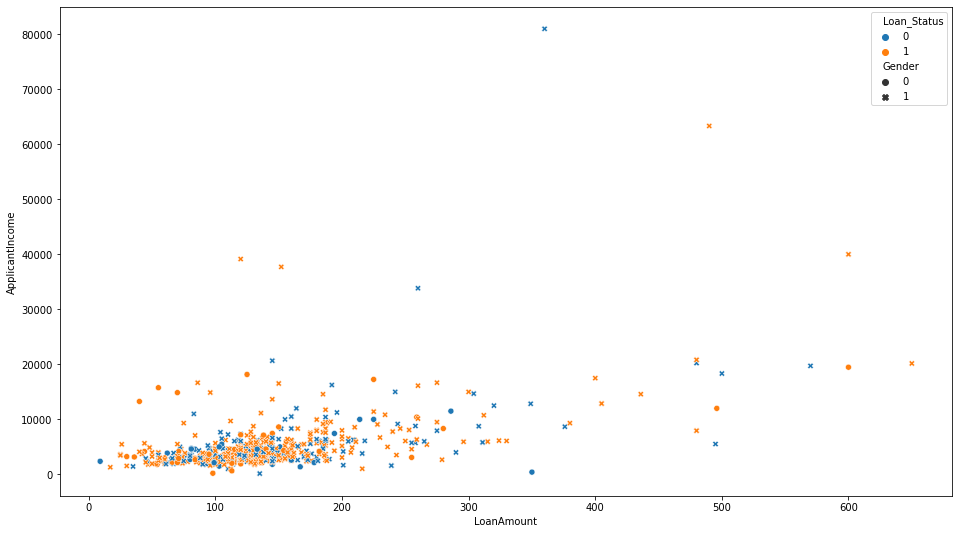

In [ ]:
plt.figure(figsize=(16,9))
sns.scatterplot(x="LoanAmount", y="ApplicantIncome", hue="Loan_Status", style="Gender",data=df)

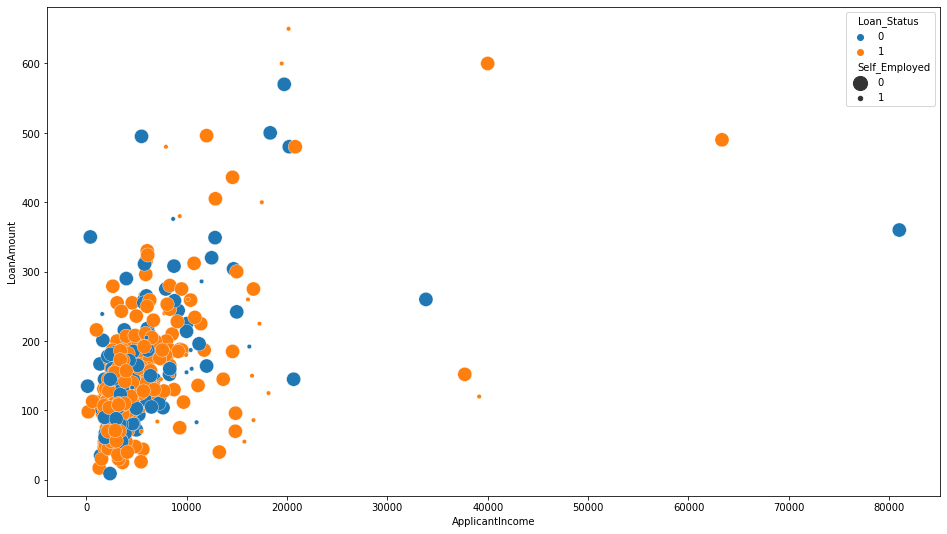

In [ ]:
plt.figure(figsize=(16,9))
sns.scatterplot(
    data=df, x="ApplicantIncome", y="LoanAmount", hue="Loan_Status", size="Self_Employed",
    sizes=(20, 200), legend="full"
)

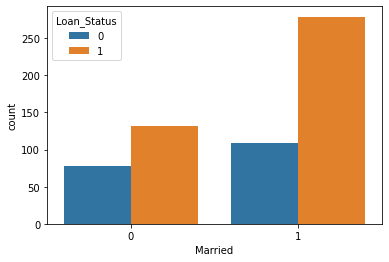

In [ ]:
sns.countplot(x='Married',hue='Loan_Status',data=df)


In [ ]:
corr = df.corr()
corr['Loan_Status'].abs().sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.535930
Property_Area        0.104984
Married              0.093183
Education            0.081617
CoapplicantIncome    0.058194
LoanAmount           0.054283
ApplicantIncome      0.025248
Gender               0.021239
Loan_Amount_Term     0.017305
Self_Employed        0.017230
Dependents           0.001022
Name: Loan_Status, dtype: float64

#Train/Test Split, Standard.

In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
X_ = df.iloc[:,0:-1]#tutte le colonne dalla 0 alla penultima (l'ultima è il target) EN: I take all the columns but the last one, which is my target
y = df.iloc[:,-1]#prendo l'ultima colonna EN: I take my target - last column


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
standardized_data = sc.fit_transform(X_) #

X = standardized_data

In [ ]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=667
                                                    )

In [ ]:
print(X.shape, X_train.shape, X_test.shape)


(598, 11) (418, 11) (180, 11)


#Model

>1, train: 0.775, test: 0.639
>2, train: 0.835, test: 0.744
>3, train: 0.835, test: 0.744
>4, train: 0.837, test: 0.750
>5, train: 0.842, test: 0.750
>6, train: 0.854, test: 0.750
>7, train: 0.876, test: 0.750
>8, train: 0.895, test: 0.750
>9, train: 0.923, test: 0.750
>10, train: 0.950, test: 0.739
>11, train: 0.974, test: 0.744
>12, train: 0.988, test: 0.739
>13, train: 0.998, test: 0.739
>14, train: 0.998, test: 0.733
>15, train: 1.000, test: 0.739
>16, train: 1.000, test: 0.750
>17, train: 1.000, test: 0.733
>18, train: 1.000, test: 0.733
>19, train: 1.000, test: 0.733
>20, train: 1.000, test: 0.733


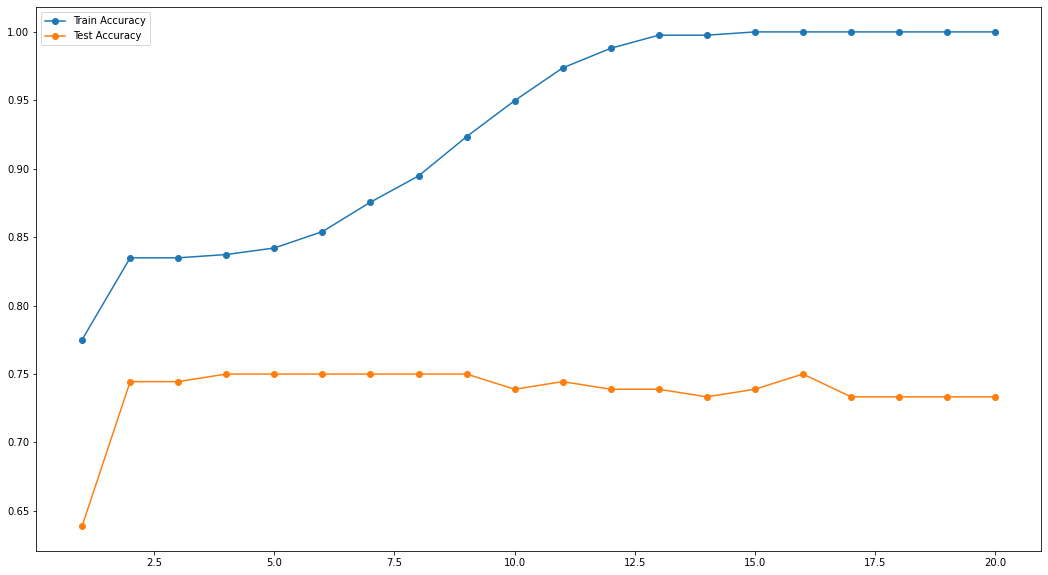

In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_scores, test_scores = [],[]
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_y_pred = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_y_pred)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_y_pred = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_y_pred)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth

plt.figure(figsize=(18,10))
plt.plot(values, train_scores, '-o', label='Train Accuracy')
plt.plot(values, test_scores, '-o', label='Test Accuracy')
plt.legend();

In [ ]:
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=10)


In [ ]:
classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=667)

Text(0.5, 0, 'Relative Importance')

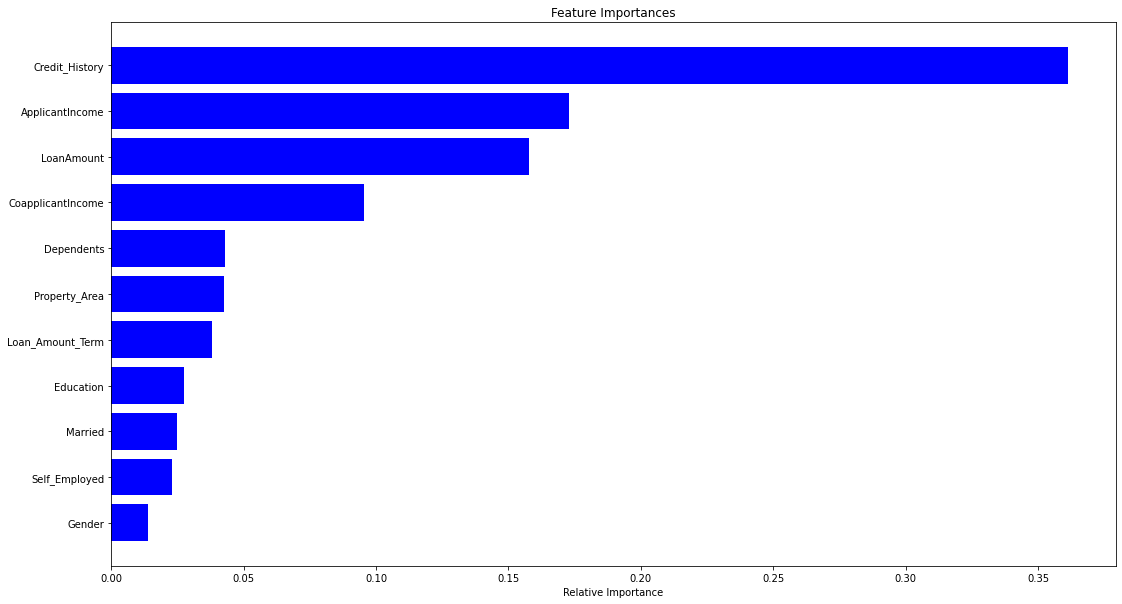

In [ ]:
#Feature importance for Random Forest
features = X_.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

#Model Evaluation

In [ ]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test, y_pred)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7388888888888889


In [ ]:
labels = ['No Loan', 'Yes Loan']


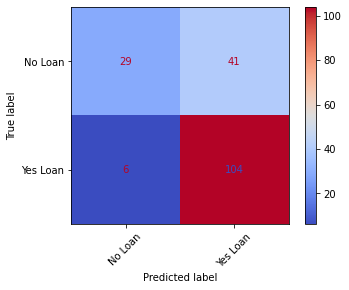

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

#labels = ['class1', 'class2']
cm = ConfusionMatrixDisplay.from_estimator(classifier, 
                                      X_test, 
                                      y_test,
                                      cmap='coolwarm',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     No Loan       0.83      0.41      0.55        70
    Yes Loan       0.72      0.95      0.82       110

    accuracy                           0.74       180
   macro avg       0.77      0.68      0.68       180
weighted avg       0.76      0.74      0.71       180



#ROC Curves

In [ ]:
!pip install plot-metric --quiet


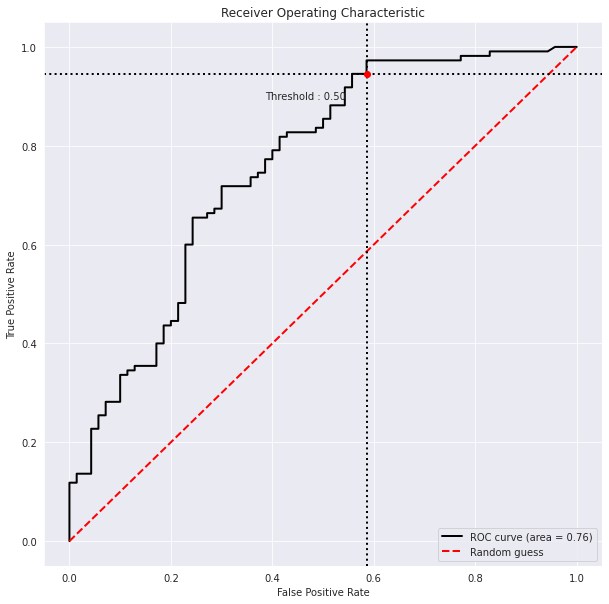

In [ ]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba)

0.757077922077922

#P-R Curves

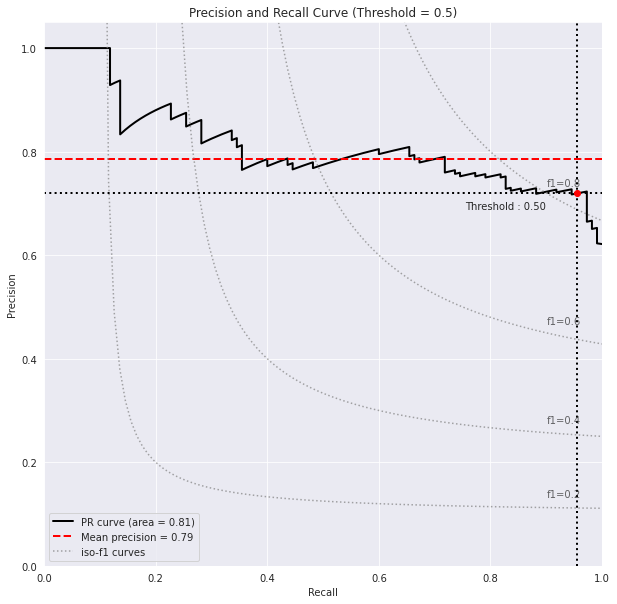

In [ ]:
# Figures
plt.figure(figsize=(10,10))
bc.plot_precision_recall_curve();

#Making a Predictive System + Normalization


In [ ]:
input_data = [1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0]

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction[0])

if (prediction[0] == 0):
  print('No access to Loan')
else:
  print('Yes access to Loan')

[[ 2.09460913  0.73568819  0.23977195  0.53480978 -0.38729833 -0.12223417
  -0.04185237 -0.20905623  0.28085351  0.44980383 -1.24447436]]
1
Yes access to Loan


#Features selection with pipeline

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

featu=[]
for i in range(2,len(X_.columns)):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=10)
    pipe = Pipeline([
                    ('scaler', StandardScaler()),
                    ('featureselection',rfe),
                    ('classifier',classifier)
                    ])
    pipe.fit(X_train,y_train)
    test_y_pred = pipe.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    y_pred_proba = pipe.predict_proba(X_test)[::,1]
    roc_auc = roc_auc_score(y_test,y_pred_proba)
    featu.append(roc_auc)
    # summarize progress
    print('feature selected %d, Acc.Test: %.3f, AUC: %.3f' % (i, test_acc, roc_auc ))

print('\n Best number of feature selection is: %d' % (np.argmax(featu) +2))

feature selected 2, Acc.Test: 0.700, AUC: 0.662
feature selected 3, Acc.Test: 0.750, AUC: 0.720
feature selected 4, Acc.Test: 0.744, AUC: 0.740
feature selected 5, Acc.Test: 0.733, AUC: 0.719
feature selected 6, Acc.Test: 0.739, AUC: 0.712
feature selected 7, Acc.Test: 0.739, AUC: 0.753
feature selected 8, Acc.Test: 0.750, AUC: 0.769
feature selected 9, Acc.Test: 0.744, AUC: 0.755
feature selected 10, Acc.Test: 0.739, AUC: 0.757

 Best number of feature selection is: 8


In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=8)
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=10)

pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('featureselection',rfe),
                ('classifier',classifier)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('featureselection',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=8)),
                ('classifier',
                 RandomForestClassifier(max_depth=10, random_state=667))])

In [ ]:
input_data = [1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0]

prediction = pipe.predict([input_data])
print(prediction[0])

if (prediction[0] == 0):
  print('No access to Loan')
else:
  print('Yes access to Loan')

0
No access to Loan


#Saving pipeline

In [ ]:
import joblib
joblib.dump(pipe,'pipe_loan.pkl')

['pipe_loan.pkl']

In [ ]:
uploaded_model = joblib.load('pipe_loan.pkl')

uploaded_model.predict([input_data])[0] #0 means No Loan

0